# Problem Set 2: Networking

Authors:
`Jangwon Park`
`Sascha Frey`
`Kuber Malhotra`

## Key Assumption
* The adjacency matrix is unweighted, undirected, and symmetric

# Import Data

In [293]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import networkx as nx
from sklearn.cluster import KMeans

In [123]:
file_handle = open("SMS-network.txt", 'r')
network_data = file_handle.readlines()

# Sparse matrix of arbitrarily large size
adjacency = sparse.lil_matrix((10000,10000), dtype=np.int8)

# Store the data in an adjacency matrix
for i in range(len(network_data)):
    line = str.split(network_data[i])
    adjacency[int(line[0]), int(line[1])] = 1;
    adjacency[int(line[1]), int(line[0])] = 1; # symmetric

# Convert to numpy array
adjacency = adjacency.toarray()

# Remove all-zero rows and columns
zero_index = np.where(np.sum(adjacency, axis=0) == 0)[0]
adjacency = np.delete(adjacency, zero_index, axis=0)
adjacency = np.delete(adjacency, zero_index, axis=1)

print("Number of nodes in our network: {n:}".format(n=adjacency.shape[0]))
print("Number of edges in our network: {e:}".format(e=int(np.count_nonzero(adjacency)/2)))

Number of nodes in our network: 4039
Number of edges in our network: 88234


# Section I: Exploratory Data Analysis

Text(0.5, 1.05, 'adjacency matrix')

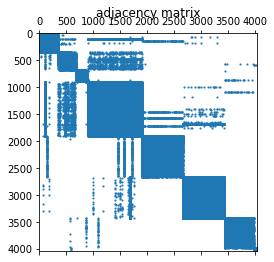

In [124]:
# Visualize our network
plt.spy(adjacency, markersize=1)
plt.title('adjacency matrix')

* Out network is quite sparse.
* The network is approximately "block diagonal".
* We can suspect that our network could be comprised of multiple components which are disconnected from each other.

### Check connectedness

In [130]:
G = nx.from_numpy_matrix(adjacency)
print("Is our network connected: {a:}".format(a=nx.is_connected(G)))

Is our network connected: True


* Turns out that our network is indeed one giant connected component

### Node degree distribution

In [180]:
degrees = []
for i,d in enumerate(G.degree):
    degrees.append(d[1])

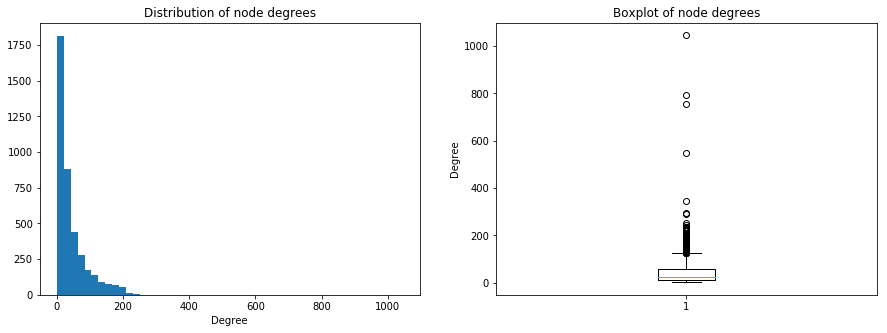

Max. node degree: 1045
Min. node degree: 1
Mean node degree: 43


In [191]:
# Distriution of node degrees
fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(5)

ax[0].hist(degrees, bins=50)
ax[0].set_title("Distribution of node degrees")
ax[0].set_xlabel("Degree")

ax[1].boxplot(degrees)
ax[1].set_title("Boxplot of node degrees")
ax[1].set_ylabel("Degree")

plt.show()

print("Max. node degree: {m:}".format(m=max(degrees)))
print("Min. node degree: {m:}".format(m=min(degrees)))
print("Mean node degree: {m:}".format(m=int(np.mean(degrees))))

* Vast majority of the nodes have small degrees
* Node degree is roughly exponentially distributed, with very few nodes have very large degrees

### Betweenness centrality distribution
* A node's betweenness centrality is informally defined as the number of shortest paths that ever pass through a node
* Nodes with high betweenness centralities could potentially be great "information spreaders"

In [194]:
bw = nx.betweenness_centrality(G)
centralities = bw.values()

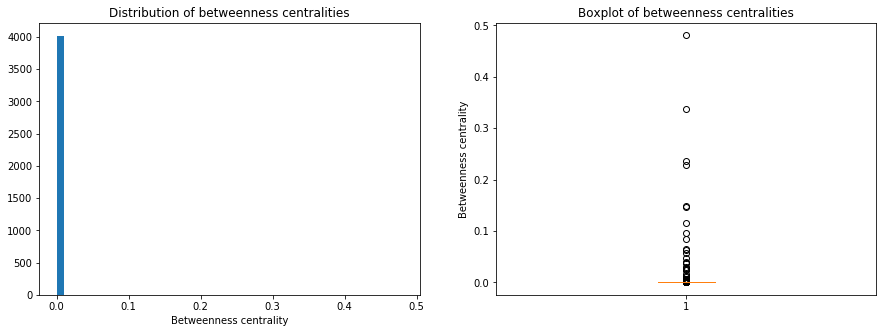

Max. betweenness centrality: 0.48
Min. betweenness centrality: 0.0
Mean betweenness centrality: 0.0006669573568730236


In [283]:
# Distribution of betweenness centralities
fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(5)

ax[0].hist(centralities, bins=50)
ax[0].set_title("Distribution of betweenness centralities")
ax[0].set_xlabel("Betweenness centrality")

ax[1].boxplot(centralities)
ax[1].set_title("Boxplot of betweenness centralities")
ax[1].set_ylabel("Betweenness centrality")

plt.show()

print("Max. betweenness centrality: {m:.2f}".format(m=max(centralities)))
print("Min. betweenness centrality: {m:}".format(m=min(centralities)))
print("Mean betweenness centrality: {m:}".format(m=np.mean(list(centralities))))

* Nearly all nodes have betweenness centrality close to 0 (which we confirm below)
* Very few nodes have anything higher than 0, which implies that there are only a very small set of 'important' individuals

In [272]:
# Count the number of nodes with betweenness centrality > 0.01
print("Number of nodes with centrality greater than 0.01: {g:}".format(g=sum(np.array(list(centralities))>0.01)))

Number of nodes with centrality greater than 0.01: 24


### Closeness centrality distribution

* A node's closeness centrality is informally defined as the reciprocal of the sum of all its pairwise shortest path lengths to the rest of the network
* Nodes with closeness centrality close to 1 can therefore be considered 'important' for spreading news.

In [274]:
closeness = nx.closeness_centrality(G)
close = closeness.values()

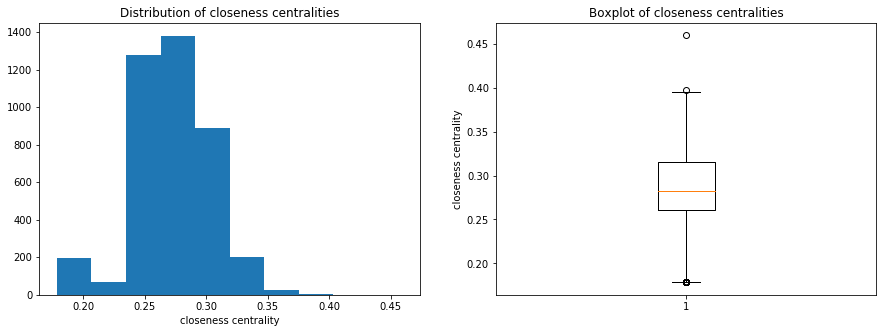

Max. closeness centrality: 0.46
Min. closeness centrality: 0.1782545358230698
Mean closeness centrality: 0.2761677635668376


In [284]:
# Distribution of closeness centralities
fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(5)

ax[0].hist(close)
ax[0].set_title("Distribution of closeness centralities")
ax[0].set_xlabel("closeness centrality")

ax[1].boxplot(close)
ax[1].set_title("Boxplot of closeness centralities")
ax[1].set_ylabel("closeness centrality")

plt.show()

print("Max. closeness centrality: {m:.2f}".format(m=max(close)))
print("Min. closeness centrality: {m:}".format(m=min(close)))
print("Mean closeness centrality: {m:}".format(m=np.mean(list(close))))

* Closeness centrality appears more normally distributed about the mean 0.276, which may imply that this is a more informative feature than betweenness centrality

### Correlation between betweenness/closeness/degree centralities

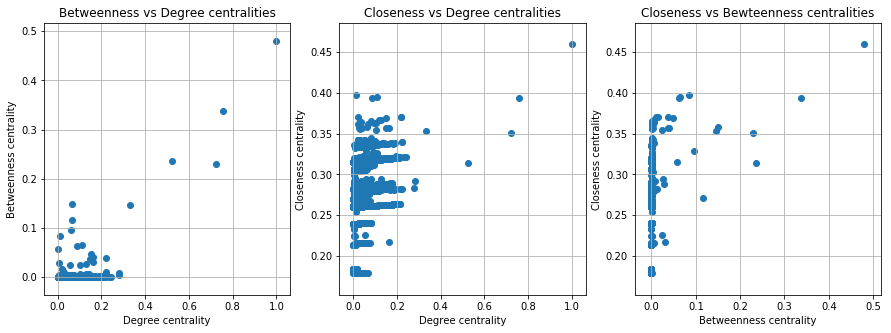

In [290]:
# First normalize degrees to be in [0,1]
degrees = np.array(degrees) / max(degrees)

# Plot correlation
fig, ax = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(5)

ax[0].scatter(degrees, centralities)
ax[0].set_title("Betweenness vs Degree centralities")
ax[0].set_ylabel("Betweenness centrality")
ax[0].set_xlabel("Degree centrality")

ax[1].scatter(degrees, close)
ax[1].set_title("Closeness vs Degree centralities")
ax[1].set_ylabel("Closeness centrality")
ax[1].set_xlabel("Degree centrality")

ax[2].scatter(centralities, close)
ax[2].set_title("Closeness vs Bewteenness centralities")
ax[2].set_ylabel("Closeness centrality")
ax[2].set_xlabel("Betweenness centrality")

ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.show()

* There appears to be some positive, linear relationship among all three metrics.
* Correlation analysis involving betweenness centrality is limited because so many values are so close to 0.
* Nevertheless, this implies that a node with high degree centrality, for instance, may have high betweenness and closeness centralities.

### Shortest path lengths (min, max, and mean)

In [220]:
lengths = nx.shortest_path_length(G) # variable type: generator
mean_lengths = []
max_lengths = []
min_lengths = []
for n,d in lengths:
    max_lengths.append(max(d.values()))
    min_lengths.append(min(list(d.values())[1:])) # not including itself => o/w it will return min = 0
    mean_lengths.append(np.mean(list((d.values()))))

Text(0, 0.5, 'Length')

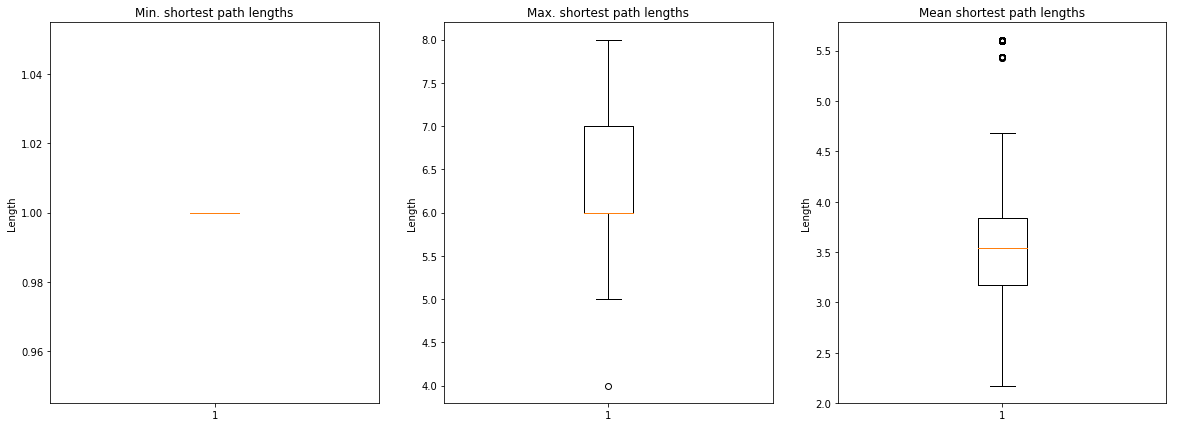

In [221]:
# Box plot of pairwise shortest path lengths
fig, ax = plt.subplots(1,3)
fig.set_figheight(7)
fig.set_figwidth(20)

ax[0].boxplot(min_lengths[min_lengths!=0])
ax[0].set_title("Min. shortest path lengths")
ax[0].set_ylabel("Length")

ax[1].boxplot(max_lengths)
ax[1].set_title("Max. shortest path lengths")
ax[1].set_ylabel("Length")

ax[2].boxplot(mean_lengths)
ax[2].set_title("Mean shortest path lengths")
ax[2].set_ylabel("Length")

* Despite a large network, max. shortest path ever is only 8 hops.
* Mean shortest path length (for each node) is roughly equally distributed about 3.5 hops; however, there are a very few nodes with slightly more than that.
* 'Small world phenomenon': On average, I could reach a total stranger who could be on the other side of the world through only 3.5 people.

# Section II: Clustering
Some assumptions on how to quantify the 'importance' of nodes:
* Having a high betweenness centrality is equivalent to spreading information fast (since more shortest paths pass through these nodes)
* Having a high closeness centrality is equivalent to spreading information fast (since paths through these nodes are shorter)
* Having a high degree centrality is equivalent to spreading information fast (since there are more neighbors)

### Feature generation

In [296]:
# Convert to iterable data types (e.g. list)
degrees = list(degrees)
centralities = list(centralities)
close = list(close)

# Create a vector of length 3 for each node: [degree centrality, betweenness centrality, closeness centrality]
X = np.empty((adjacency.shape[0], 3))
for i in range(adjacency.shape[0]):
    X[i,0] = degrees[i]
    X[i,1] = centralities[i]
    X[i,2] = close[i]

### K-means clustering with data matrix X (with different values of K)

In [306]:
# candidate values of K
k = [3, 4, 5, 6, 7, 8, 9, 10]

# Fit KMeans model
models = []
y_kmeans = []
for i, c in enumerate(k):
    kmeans = KMeans(n_clusters = c)
    kmeans.fit(X)
    models.append(kmeans)
    y_kmeans.append(kmeans.predict(X))

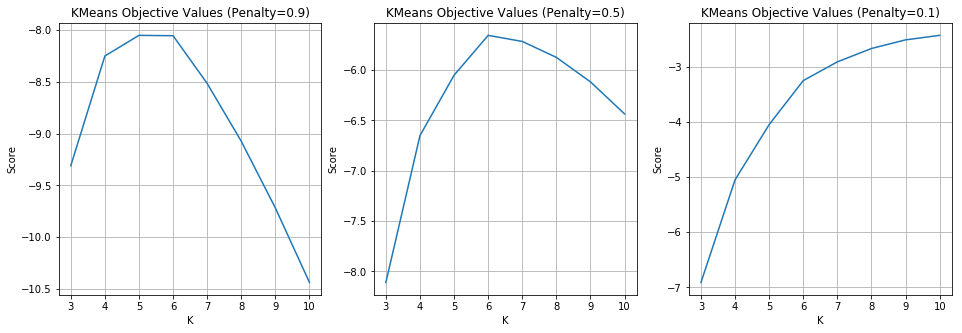

In [333]:
# Visualize the objective values for each value of K
scores1 = []
scores2 = []
scores3 = []
for i, s in enumerate(models):
    scores1.append(s.score(X) - 0.9*k[i])
    scores2.append(s.score(X) - 0.5*k[i])
    scores3.append(s.score(X) - 0.1*k[i])

fig, ax = plt.subplots(1,3)
fig.set_figwidth(16)
fig.set_figheight(5)

ax[0].plot(k,scores1)
ax[0].set_title("KMeans Objective Values (Penalty=0.9)")
ax[0].set_xlabel("K")
ax[0].set_ylabel("Score")
ax[0].grid()

ax[1].plot(k,scores2)
ax[1].set_title("KMeans Objective Values (Penalty=0.5)")
ax[1].set_xlabel("K")
ax[1].set_ylabel("Score")
ax[1].grid()

ax[2].plot(k,scores3)
ax[2].set_title("KMeans Objective Values (Penalty=0.1)")
ax[2].set_xlabel("K")
ax[2].set_ylabel("Score")
ax[2].grid()

plt.show()

* We apply some penalty for including higher K
* For different sizes of this penalty, we can see that `K = 6` is roughly a reasonable choice

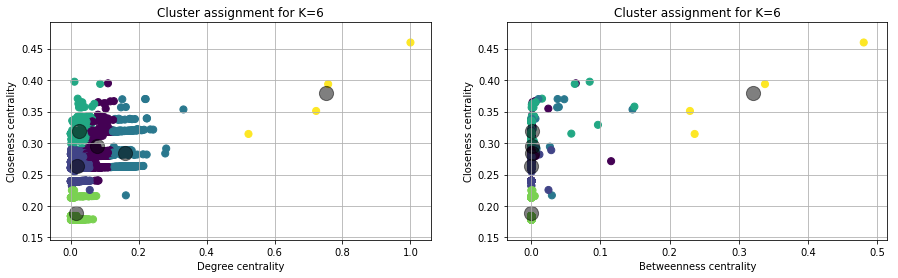

In [339]:
# Visualize
fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)

ax[0].scatter(X[:, 0], X[:, 2], c=y_kmeans[3], s=50, cmap='viridis')
centers = models[3].cluster_centers_
ax[0].scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);
ax[0].set_title("Cluster assignment for K=6")
ax[0].set_ylabel("Closeness centrality")
ax[0].set_xlabel("Degree centrality")
ax[0].grid()

ax[1].scatter(X[:, 1], X[:, 2], c=y_kmeans[3], s=50, cmap='viridis')
centers = models[3].cluster_centers_
ax[1].scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);
ax[1].set_title("Cluster assignment for K=6")
ax[1].set_ylabel("Closeness centrality")
ax[1].set_xlabel("Betweenness centrality")
ax[1].grid()

In [352]:
# Find the nodes in the "yellow" cluster
nodes = np.where(models[3].labels_ == 5)[0]
print("Nodes in the 'most important' cluster: {n:}".format(n=nodes))

Nodes in the 'most important' cluster: [ 107 1684 1912 3437]


* According to K-means with K=6, these four individuals are best for spreading news quickly

### Result visualization

In [355]:
import pygsp as pg
from matplotlib import gridspec

# Create pygsp graph for visualization
G_flow = pg.graphs.Graph(adjacency)
G_flow.set_coordinates('spring')
fig = plt.figure(figsize=(18, 21))
gs = gridspec.GridSpec(3, 2, width_ratios=[2, 1], bottom=0.2) 

distance_matrix = np.asarray(nx.floyd_warshall_numpy(G))

for set_kt_flow in nodes:
    distance = np.minimum(distance_matrix[set_kt_flow[0],:], distance_matrix[set_kt_flow[1],:] )
    for j in range(2, len(set_kt_flow)):
        # Update distance as minimum between the new node and the set
        distance = np.minimum(distance_matrix[set_kt_flow[j], :], distance)
        
    ax = plt.figure()
    G_flow.plot_signal(distance, colorbar=True, ax=ax, highlight=nodes, limits=[0,max_d])

IndexError: invalid index to scalar variable.

<Figure size 1296x1512 with 0 Axes>